Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [ ]:
NICKNAME = "Idrisova Alexandra"

---

# Метод Монте-Карло: расчет погрешности
Вероятно, вы уже сталкивались с концепцией [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty). Идея заключается в том, что по заданным измерениям с погрешностями, мы можем найти неопределенность конечного результата. 
Например, рассмотрим следующее равенство:
$$F = \frac{G M_1 M_2}{r^2}$$
Оно определяет гравитационное взаимодействие между двумя телами массами $M_1$ и $M_2$, расположенными друг от друга на расстоянии r. 
Пусть
    $$M_1 = 40 × 10^4 ± 0.05 × 10^4 kg$$ 
    $$M_2 = 30 × 10^4 ± 0.1 × 10^4 kg$$
    $$r = 3.2 ± 0.01 m$$

Предполагаем, что ошибки измерения описываются Гауссовым распределением, величины стандартных отклонений которых суть наблюдаемые неопределённости $a = \left< a\right>\pm \sigma_a$.

Гравитационная постоянная -- константа.
$$G = 6.67384×10^{−11} m^3 kg^{−1} s^{−2}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задание 1.1
Напишите функцию, определяющую среднее и стандартное отклонение распределения силы с помощью стандартного метода:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas

In [7]:
def error(M1, dM1, M2, dM2, r, dr):
    G = 6.67384*10**(-11)
    sigma_M1M2 = M1*M2*((dM1/M1)**2+(dM2/M2)**2)**0.5
    sigma_r2 = 2*r*dr
    sigma = G*((sigma_M1M2/(M1*M2))**2+(sigma_r2/r**2)**2)**0.5
    F = G*M1*M2/r**2
    return F, sigma

In [8]:
print(error(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01))

(0.7820906249999999, 4.800347539318839e-13)


Теперь давайте попробуем получить то же распределение с помощью метода Монте Карло. Он заключается в многократной генерации случайных входных данных и анализе полученных результатов.
В нашем алгоритм следующий:

1.Генерируем гауссово распределение случайных величин $M_1, M_2$ и $r$ ($10^6$ точек), используя средние значение и стандартные отклонения, указаные выше.
    
2.Для каждой реализации вычисляем силу.

Совет: Не используйте циклы. Чтобы получить $10^6$ случайных точек, используйте библиотеку numpy.

# Задание 1.2 

Напишите функцию, которая моделирует силу методом Монте-Карло и строит нормированную гистограмму.

[ 0.79831685 21.60730968  0.07194491 ...  1.16302439 11.10523035
  1.30283137]


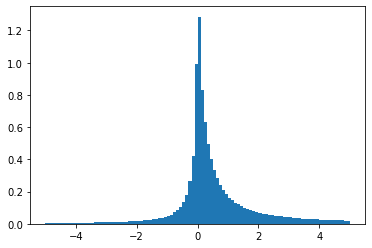

In [92]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    M1_v = normal(M1-2*dM1, M1+2*dM2, n)
    M2_v = normal(M2-2*dM2, M2+2*dM2, n)
    r_v = normal(r-2*dr, r+2*dr, n)
    F_v = np.asarray([6.67384*10**(-11)*M1_v[i]*M2_v[i]/r_v[i]**2 for i in range(n)])
    print(F_v)
    F, bins, patches = plt.hist(F_v, 100, range=(-5, 5), density=True)
MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)


# Задание 1.3

Постройте гистограмму распределения силы методом Монте-Карло,вызвав MonteCarloNormal, а также постройте график гауссовой плотности вероятности с параметрами, полученными из error().

Совет: Убедитесь, что вы верно выбрали пределы величины x и оба графика видны. Выберите разумное количество столбиков гистограммы и сравните форму гистограммы и графика.

[ 1.94643511e+00 -1.06741899e-02 -3.67743518e-01 ...  8.64398282e-03
  3.54641093e+00  2.15666571e-03]


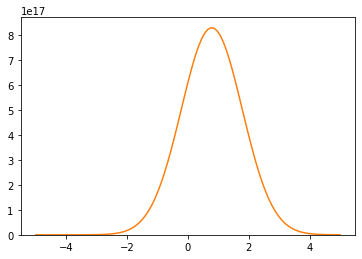

In [90]:
F_av, F_sigma = 0.7820906249999999, 4.800347539318839e-13
MonteCarloNormal(40*10**4, 0.05 * 10**4, 30 * 10**4, 0.1 * 10**4, 3.2, 0.01)
F = np.linspace(-5, 5, 100)
plt.plot(F, 10**6/(np.sqrt(2*np.pi)*F_sigma)*np.exp(-0.5*(F - F_av)**2))

Сделайте вывод о согласованности двух подходов.

# Задание 2.1
Повторите те же действия для следующих данных:

$$M1=40×10^4±2×10^4kg$$
$$M2=30×10^4±10×10^4kg$$
$$r=3.2±1.0 m$$

и постройте графики.

[-28.82766068  -0.72241721   0.3653855  ...   4.18509076  44.59242236
  -0.40919436]


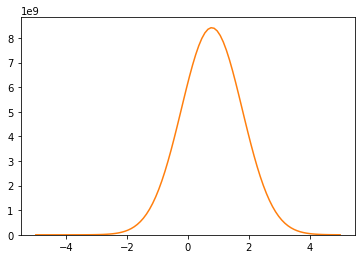

In [94]:
def error(M1, dM1, M2, dM2, r, dr):
    G = 6.67384*10**(-11)
    sigma_M1M2 = M1*M2*((dM1/M1)**2+(dM2/M2)**2)**0.5
    sigma_r2 = 2*r*dr
    sigma = G*((sigma_M1M2/(M1*M2))**2+(sigma_r2/r**2)**2)**0.5
    F = G*M1*M2/r**2
    return F, sigma

def MonteCarloNormal(M1, dM1, M2, dM2, r, dr, n=10**6):
    M1_v = normal(M1-2*dM1, M1+2*dM2, n)
    M2_v = normal(M2-2*dM2, M2+2*dM2, n)
    r_v = normal(r-2*dr, r+2*dr, n)
    F_v = np.asarray([6.67384*10**(-11)*M1_v[i]*M2_v[i]/r_v[i]**2 for i in range(n)])
    print(F_v)
    F, bins, patches = plt.hist(F_v, 100, range=(-5, 5), density=True)

F_av, F_sigma = error(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
MonteCarloNormal(40*10**4, 2 * 10**4, 30 * 10**4, 10 * 10**4, 3.2, 1)
F = np.linspace(-5, 5, 100)
plt.plot(F, 1/(np.sqrt(2*np.pi)*F_sigma)*np.exp(-0.5*(F - F_av)**2))


# Задание 2.2

Какой метод более точный в этом случае и почему? Как вы думаете, в чем состоят преимущества метода Монте-Карло?

YOUR ANSWER HERE